In [ ]:
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_data = test_datagen.flow_from_directory('drive/MyDrive/Project_DAP391m_group2/Data/Data_detected/Test_Detected',
                                            target_size=(256, 256),
                                            batch_size=32,
                                            class_mode='binary')



Found 54 images belonging to 2 classes.


In [ ]:
import pandas as pd

# Đọc dữ liệu từ tệp kết quả (thay thế bằng đường dẫn đến tệp của bạn)
result_data = pd.read_excel('drive/MyDrive/Project_DAP391m_group2/Data/Data_detected/classification_results.xlsx')

# Đếm số lượng mỗi loại nhãn
label_counts = result_data['Classification'].value_counts()

# In kết quả
print(label_counts)

not cheating    168
cheating         11
Name: Classification, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import load_model

# Đường dẫn đến mô hình đã huấn luyện
model_path = 'drive/MyDrive/Project_DAP391m_group2/Data/Data_detected/cheating_detection_model.h5'

# Tải lại mô hình
model = load_model(model_path)


In [ ]:
# Dự đoán kết quả trên tập kiểm tra
y_pred = model.predict(test_data)

# Chuyển các dự đoán thành các nhãn nhị phân
y_pred_binary = (y_pred > 0.5).astype(int)

# Tính các thông số đánh giá
accuracy = accuracy_score(test_data.classes, y_pred_binary)
precision = precision_score(test_data.classes, y_pred_binary)
recall = recall_score(test_data.classes, y_pred_binary)
f1 = f1_score(test_data.classes, y_pred_binary)



2/2 [==============================] - 1s 246ms/step


In [ ]:
import pandas as pd

evaluation_data = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                'Value': [accuracy, precision, recall, f1]})


In [ ]:
# In thông số đánh giá ra màn hình
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.6296296296296297
Precision: 0.675
Recall: 0.7941176470588235
F1-Score: 0.7297297297297296


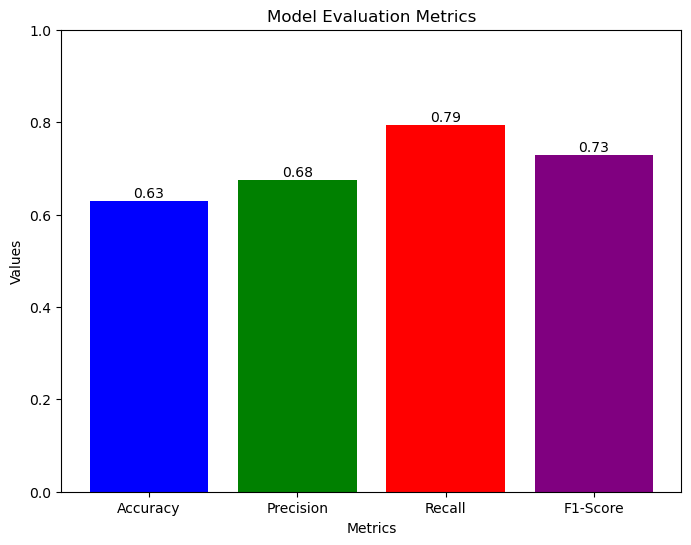

In [ ]:
import matplotlib.pyplot as plt

# Dữ liệu đánh giá
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)  # Điều chỉnh giới hạn trục y nếu cần

# Hiển thị giá trị trên từng cột
for i, value in enumerate(values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# Hiển thị biểu đồ
plt.show()


# Plot loss and accuracy

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/10
938/938 [==============================] - 29s 30ms/step - loss: 0.5142 - accuracy: 0.8142 - val_loss: 0.3845 - val_accuracy: 0.8630
Epoch 2/10
938/938 [==============================] - 28s 30ms/step - loss: 0.3444 - accuracy: 0.8752 - val_loss: 0.3349 - val_accuracy: 0.8789
Epoch 3/10
938/938 [==============================] - 29s 31ms/step - loss: 0.2955 - accuracy: 0.8931 - val_loss: 0.3185 - val_accuracy: 0.8883
Epoch 4/10
938/938 [==============================] - 30s 32ms/step - loss: 0.2654 - accuracy: 0.9039 - val_loss: 0.2877 - val_accuracy: 0.8965
Epoch 5/10
938/938 [==============================] - 30s 32ms/step - loss: 0.2425 - accuracy: 0.9109 - val_loss: 0.2891 - val_accuracy: 0.8973
Epoch 6/10
938/938 [==============================] - 29s 30ms/step - loss: 0.2229 - accuracy: 0.9179 - val_loss: 0.2679 - val_accuracy: 0.9043
Epoch 7/10
938/938 [==============================] - 29s 30ms/step - los

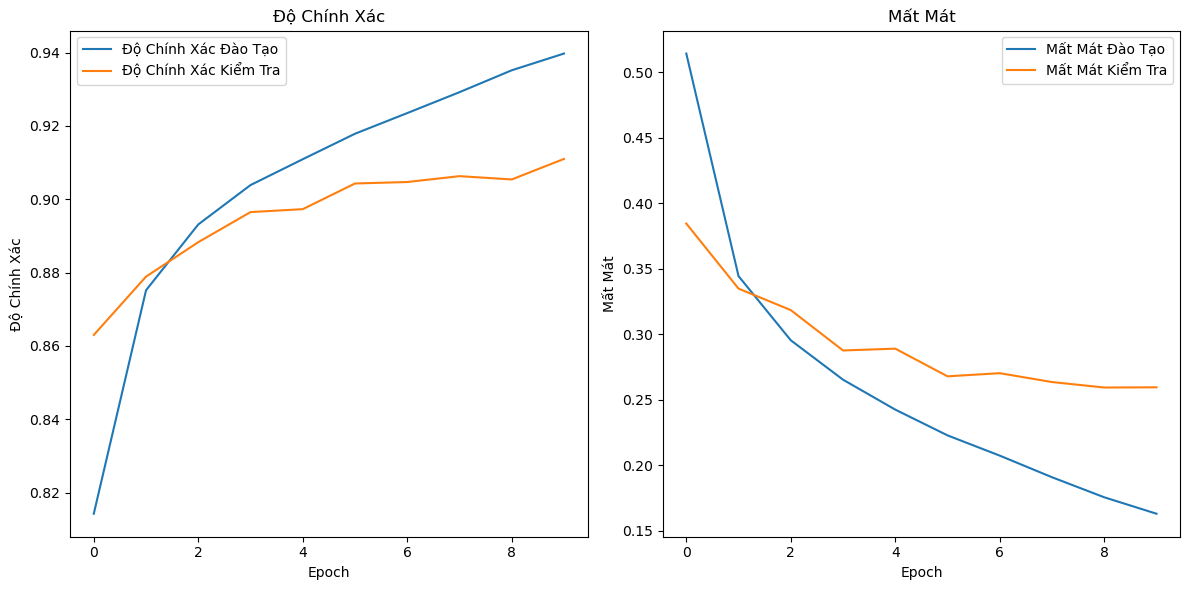

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

# Load và chuẩn bị dữ liệu
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Khởi tạo mô hình
model = Sequential()

# Lớp tích chập và lớp max pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# Lớp tích chập và lớp max pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Lớp flatten và lớp fully connected
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 là số lớp đầu ra

# Biên soạn mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Đào tạo mô hình
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Trích xuất độ chính xác và mất mát từ lịch sử đào tạo
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

# Biểu đồ độ chính xác
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Độ Chính Xác Đào Tạo')
plt.plot(val_accuracy, label='Độ Chính Xác Kiểm Tra')
plt.title('Độ Chính Xác')
plt.xlabel('Epoch')
plt.ylabel('Độ Chính Xác')
plt.legend()

# Biểu đồ mất mát
plt.subplot(1, 2, 2)
plt.plot(loss, label='Mất Mát Đào Tạo')
plt.plot(val_loss, label='Mất Mát Kiểm Tra')
plt.title('Mất Mát')
plt.xlabel('Epoch')
plt.ylabel('Mất Mát')
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()
